# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#Set units for search
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
       
        # Parse the JSON and retrieve data
        city_weather = response.json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | constantia
Processing Record 3 of Set 1 | iskateley
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | yashkul'
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | monterrey
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | tralee
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | prince rupert
Processing Record 21 of Set 1 | invercargill


Processing Record 39 of Set 4 | padam
City not found. Skipping...
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | goondiwindi
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | kungalv
Processing Record 44 of Set 4 | okhotsk
Processing Record 45 of Set 4 | thunder bay
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | aldan
Processing Record 48 of Set 4 | winnemucca
Processing Record 49 of Set 4 | san antonio de pale
Processing Record 0 of Set 5 | gulf shores
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | hermanus
Processing Record 3 of Set 5 | chilca
Processing Record 4 of Set 5 | shahpur
Processing Record 5 of Set 5 | colonia
Processing Record 6 of Set 5 | aripuana
Processing Record 7 of Set 5 | tual
Processing Record 8 of Set 5 | balkanabat
Processing Record 9 of Set 5 | nakodar
Processing Record 10 of Set 5 | jianguang
Processing Record 11 of Set 5 | odda
Processing Record 12 o

Processing Record 32 of Set 8 | salahonda
Processing Record 33 of Set 8 | gadzhiyevo
Processing Record 34 of Set 8 | dehui
Processing Record 35 of Set 8 | tsimasham
Processing Record 36 of Set 8 | al marsa
Processing Record 37 of Set 8 | kawthoung
City not found. Skipping...
Processing Record 38 of Set 8 | forster
Processing Record 39 of Set 8 | mana
Processing Record 40 of Set 8 | kargasok
Processing Record 41 of Set 8 | chiras
Processing Record 42 of Set 8 | gijang
Processing Record 43 of Set 8 | roma
Processing Record 44 of Set 8 | maceio
Processing Record 45 of Set 8 | tuy hoa
Processing Record 46 of Set 8 | jalpatagua
Processing Record 47 of Set 8 | san juan de miraflores
Processing Record 48 of Set 8 | mount gambier
Processing Record 49 of Set 8 | kourou
Processing Record 0 of Set 9 | suntar
Processing Record 1 of Set 9 | kingston
Processing Record 2 of Set 9 | chake chake
Processing Record 3 of Set 9 | de aar
Processing Record 4 of Set 9 | sars
Processing Record 5 of Set 9 | lil

Processing Record 22 of Set 12 | kruisfontein
Processing Record 23 of Set 12 | musay'id
City not found. Skipping...
Processing Record 24 of Set 12 | kulia village
City not found. Skipping...
Processing Record 25 of Set 12 | hilo
Processing Record 26 of Set 12 | zastron
Processing Record 27 of Set 12 | palembang
Processing Record 28 of Set 12 | copala
Processing Record 29 of Set 12 | seguela
Processing Record 30 of Set 12 | kolonia town
Processing Record 31 of Set 12 | ad dabbah
Processing Record 32 of Set 12 | selfoss
Processing Record 33 of Set 12 | cadale
Processing Record 34 of Set 12 | sorong
Processing Record 35 of Set 12 | clusone
Processing Record 36 of Set 12 | juneau
Processing Record 37 of Set 12 | el abiodh sidi cheikh
Processing Record 38 of Set 12 | ketchikan
Processing Record 39 of Set 12 | cedeira
Processing Record 40 of Set 12 | jiujiang
Processing Record 41 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 42 of Set 12 | dryden
----------------

In [4]:
print(city_data)

[{'City': 'port-aux-francais', 'Lat': -49.35, 'Lng': 70.2167, 'Max Temp': 2.51, 'Humidity': 98, 'Cloudiness': 100, 'Wind Speed': 17.52, 'Country': 'TF', 'Date': 1701294605}, {'City': 'constantia', 'Lat': 44.1833, 'Lng': 28.65, 'Max Temp': 3.38, 'Humidity': 74, 'Cloudiness': 60, 'Wind Speed': 6.24, 'Country': 'RO', 'Date': 1701294347}, {'City': 'iskateley', 'Lat': 67.6803, 'Lng': 53.1512, 'Max Temp': -13.32, 'Humidity': 93, 'Cloudiness': 81, 'Wind Speed': 4.47, 'Country': 'RU', 'Date': 1701294351}, {'City': 'ilulissat', 'Lat': 69.2167, 'Lng': -51.1, 'Max Temp': 4.01, 'Humidity': 41, 'Cloudiness': 75, 'Wind Speed': 12.35, 'Country': 'GL', 'Date': 1701294606}, {'City': 'alice springs', 'Lat': -23.7, 'Lng': 133.8833, 'Max Temp': 19.75, 'Humidity': 88, 'Cloudiness': 75, 'Wind Speed': 5.66, 'Country': 'AU', 'Date': 1701294607}, {'City': 'avarua', 'Lat': -21.2078, 'Lng': -159.775, 'Max Temp': 27.03, 'Humidity': 69, 'Cloudiness': 40, 'Wind Speed': 8.75, 'Country': 'CK', 'Date': 1701294314}, {'

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame.from_dict(city_data)
# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.51,98,100,17.52,TF,1701294605
1,constantia,44.1833,28.6500,3.38,74,60,6.24,RO,1701294347
2,iskateley,67.6803,53.1512,-13.32,93,81,4.47,RU,1701294351
3,ilulissat,69.2167,-51.1000,4.01,41,75,12.35,GL,1701294606
4,alice springs,-23.7000,133.8833,19.75,88,75,5.66,AU,1701294607


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.51,98,100,17.52,TF,1701294605
1,constantia,44.1833,28.6500,3.38,74,60,6.24,RO,1701294347
2,iskateley,67.6803,53.1512,-13.32,93,81,4.47,RU,1701294351
3,ilulissat,69.2167,-51.1000,4.01,41,75,12.35,GL,1701294606
4,alice springs,-23.7000,133.8833,19.75,88,75,5.66,AU,1701294607


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

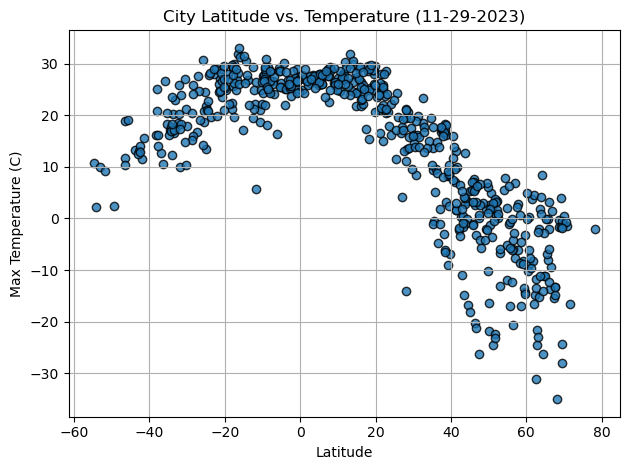

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

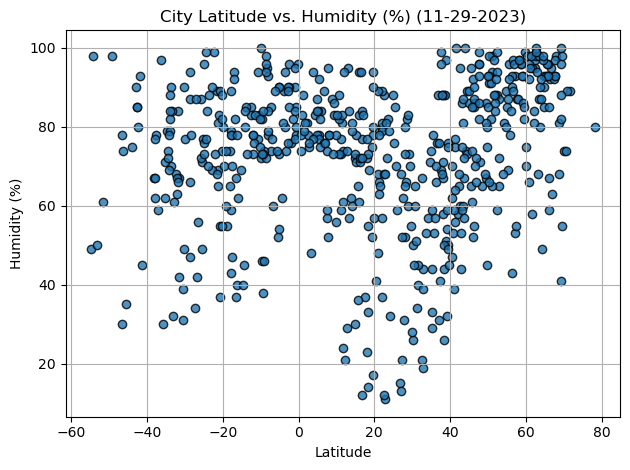

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

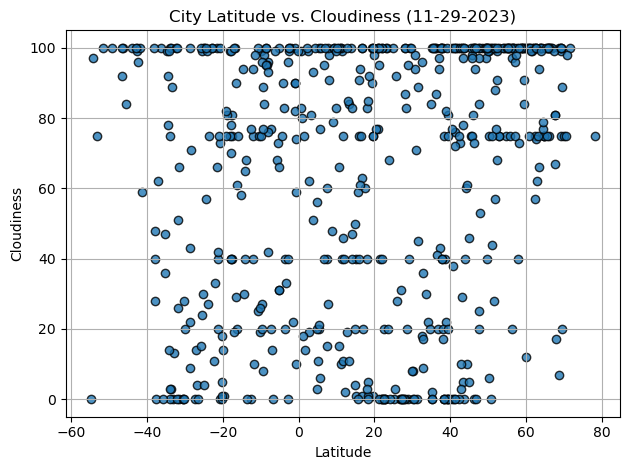

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

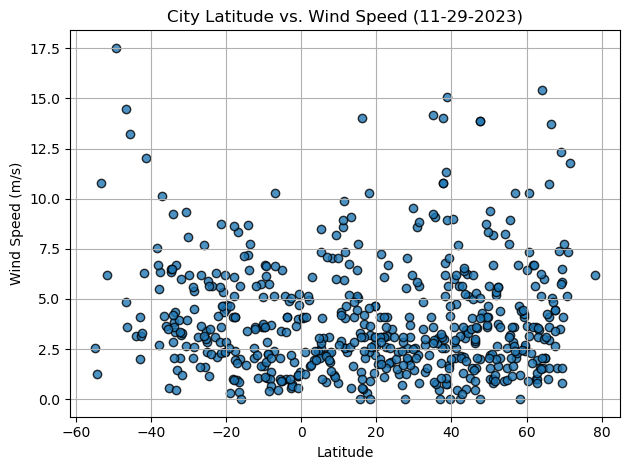

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

date = datetime.now()
date = date.strftime("%m-%d-%Y")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,constantia,44.1833,28.6500,3.38,74,60,6.24,RO,1701294347
2,iskateley,67.6803,53.1512,-13.32,93,81,4.47,RU,1701294351
3,ilulissat,69.2167,-51.1000,4.01,41,75,12.35,GL,1701294606
7,yashkul',46.1711,45.3435,7.63,92,100,2.81,RU,1701294608
8,longyearbyen,78.2186,15.6401,-2.09,80,75,6.17,SJ,1701294608


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.51,98,100,17.52,TF,1701294605
4,alice springs,-23.7000,133.8833,19.75,88,75,5.66,AU,1701294607
5,avarua,-21.2078,-159.7750,27.03,69,40,8.75,CK,1701294314
6,margaret river,-33.9500,115.0667,16.91,82,100,3.86,AU,1701294607
13,edinburgh of the seven seas,-37.0676,-12.3116,12.61,59,62,10.12,SH,1701294610


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8656932326865667
-----------------------------------
Observations about linear relationship:
The regression displays a negative relationship between temperature and latitude
In the northern hemisphere, as the latitude increases the distance from the equator increases
As you move away from the equator, the max temperature decreases.


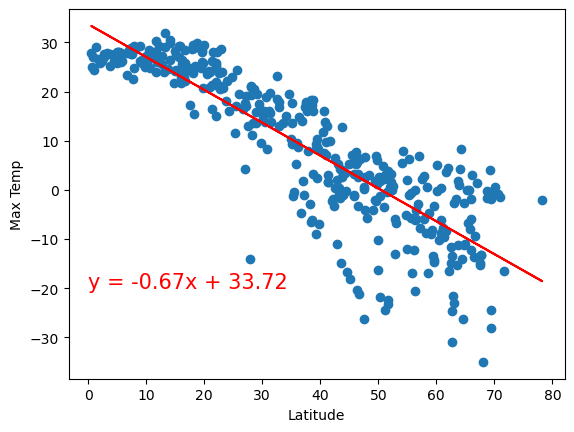

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The regression displays a negative relationship between temperature and latitude")
print("In the northern hemisphere, as the latitude increases the distance from the equator increases")
print("As you move away from the equator, the max temperature decreases.")

The r-value is 0.6885469981512407
-----------------------------------
Observations about linear relationship:
The regression displays a sligtly positive relationship between temperature and latitude.
In the southern hemisphere, as the latitude increases the distance from the equator decreases
As you move closer to the equator, the max temperature generally increases.


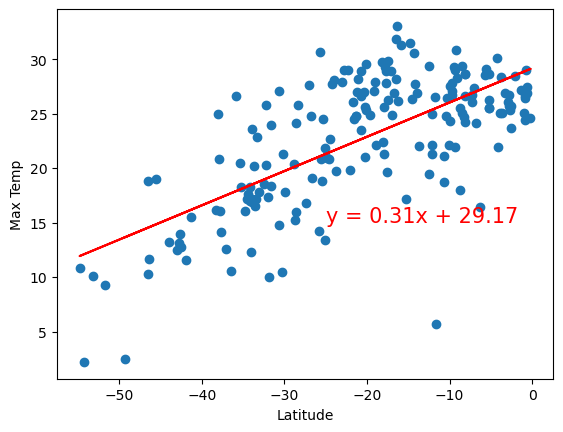

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The regression displays a sligtly positive relationship between temperature and latitude.")
print("In the southern hemisphere, as the latitude increases the distance from the equator decreases")
print("As you move closer to the equator, the max temperature generally increases.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.30033199168575375
-----------------------------------
Observations about linear relationship:
The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude


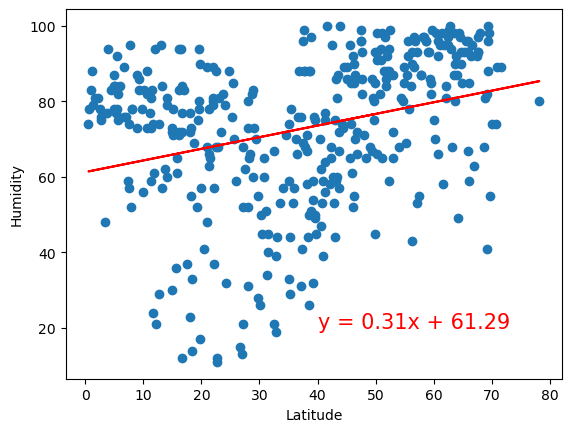

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude")

The r-value is 0.2364969040321297
-----------------------------------
Observations about linear relationship:
The relationship is slightly positive.
Humidity increases as cities get closer to the equator.


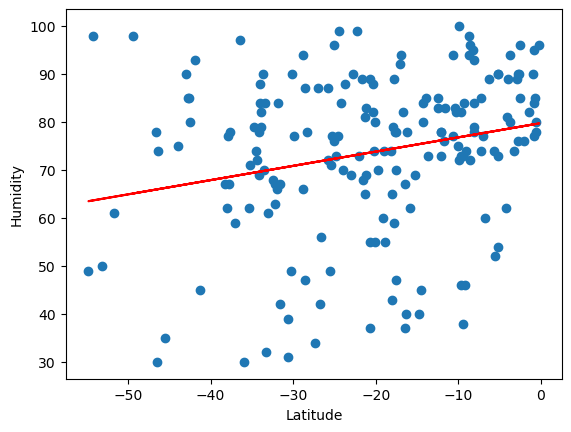

In [19]:

# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly positive.")
print("Humidity increases as cities get closer to the equator.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.29342672770984585
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and cloudiness.


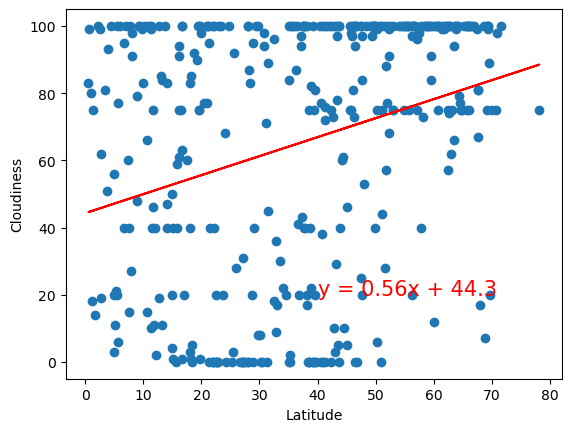

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and cloudiness.")

The r-value is 0.027589656822243444
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and cloudiness.


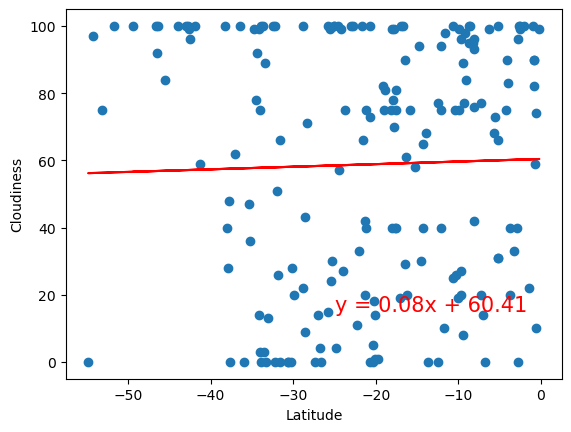

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and cloudiness.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.09111361968004968
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and wind speed.


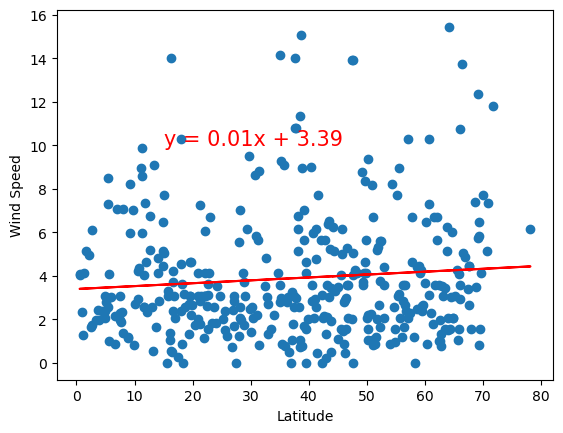

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and wind speed.")

The r-value is -0.353147097763632
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and wind speed.


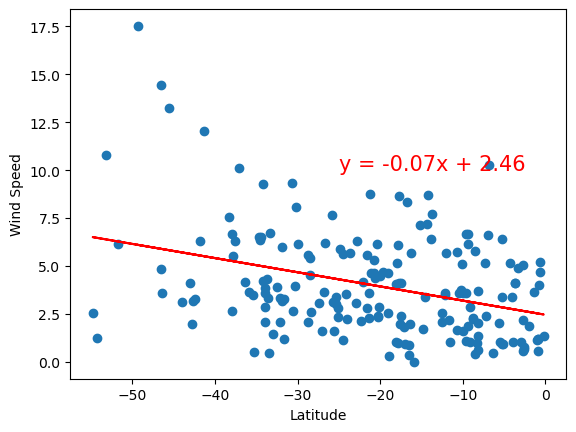

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and wind speed.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE